# Program Visualisasi Data
_Daftar Nama dan Jenis Kelamin Masyarakat Indonesia_

**Kontributor:**
- Dimas Reza Ardhana (3124600102)
- Erik Triayuda Wijaya (3124600094)

Program dibuat menggunakan bahasa **Python v3.14.0** dan menggunakan library / depedency:
- `pandas` untuk manipulasi data & data frame.
- `matplotlib` membuat visualisasi diagram.
- `seaborn` bar plots untuk matplot.
- `numpy` multi-dimentional array.

Program menggunakan Jupyter Notebook untuk mempermudah eksekusi dan pembacaan.

Konsep program:
- Kode (line 1)
- Output (line 2)

#### Cara Menjalankan Program
1. Jalankan blok kode installasi, import, dan variable definition, atau
2. Klik `Run All` atau `Execute Cell` di sebelah kiri blok kode.

In [56]:

# JALANKAN BLOK INI TERLEBIH DAHULU SEBELUM YANG LAIN

# Instalasi ke-empat paket yang digunakan
%pip install pandas matplotlib seaborn numpy ipywidgets scipy

# Mengimport paket sebagai variabel untuk digunakan dalam data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from scipy import stats

# Membaca file sumber: indonesian-names.csv
df = pd.read_csv("indonesian-names.csv")

Note: you may need to restart the kernel to use updated packages.


In [57]:
# Memfilter/membersihkan data lalu melihat apakah data telah terbaca dengan benar
df = (
    df
    .dropna()
    .drop_duplicates()
)
df = df.select_dtypes(include='object')

df

,Nama,Jenis_Kelamin
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m
...,...,...
1955,hadimah,f
1956,aprillia rahma wati,f
1957,muhamad khoirunisa. m,m
1958,sukandi,m


# Distribusi Nama Berdasarkan Kelamin

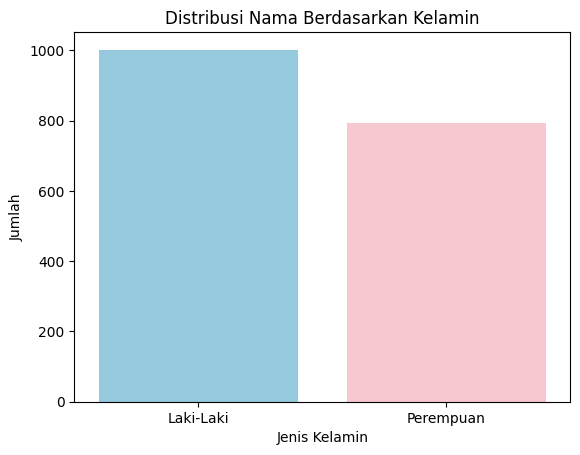

In [58]:
# Mengganti inisial menjadi kata
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].replace({'m': 'Laki-Laki', 'f': 'Perempuan'})

sns.countplot(
    x='Jenis_Kelamin', 
    data=df,
    palette={'Laki-Laki':'skyblue','Perempuan':'pink'},
    hue='Jenis_Kelamin',
    legend=False
)

plt.title('Distribusi Nama Berdasarkan Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')

plt.show()

## Frekuensi Banyak Kata dalam Sebuah Nama

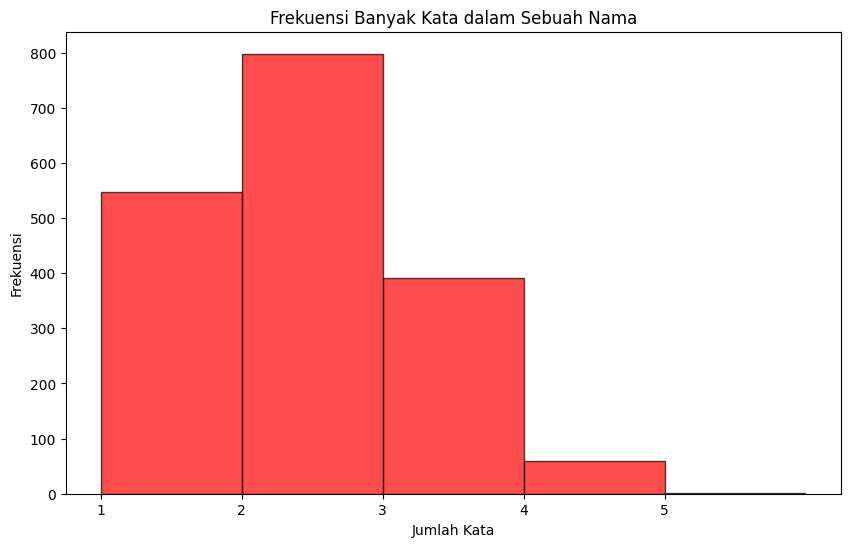

In [59]:
df['Word_Count'] = df['Nama'].astype(str).str.split().apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['Word_Count'], bins=range(1, df['Word_Count'].max() + 2), color='red', edgecolor='black', alpha=0.7)

plt.title('Frekuensi Banyak Kata dalam Sebuah Nama')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')

plt.xticks(range(1, df['Word_Count'].max() + 1))
plt.show()


### 10 Nama dengan Frekuensi Paling Sering 
### persiapan data

In [60]:
nama_split = df['Nama'].astype(str).str.split()

df['First_Name'] = nama_split.str[0].str.title()
df['Last_Name']  = nama_split.str[1].where(nama_split.str.len() >= 2).str.title() 

# M=muhammad
df['First_Name']=df['First_Name'].replace('M.','Muhammad')

# Data frame frekuensi nama awal
first_name_freq = df['First_Name'].value_counts().reset_index().head(10)
first_name_freq.columns = ['First_Name', 'Frekuensi']

# Data frame frekuensi nama akhir
last_name_freq = df['Last_Name'].value_counts().reset_index().head(10)
last_name_freq.columns = ['Last_Name', 'Frekuensi']


male_data = df[df['Jenis_Kelamin'] == 'Laki-Laki']
female_data = df[df['Jenis_Kelamin'] == 'Perempuan']

male_first_name_freq = male_data['First_Name'].value_counts().reset_index().head(10)
male_first_name_freq.columns = ['First_Name', 'Frekuensi']

female_first_name_freq = female_data['First_Name'].value_counts().reset_index().head(10)
female_first_name_freq.columns = ['First_Name', 'Frekuensi']


male_last_name_freq = male_data['Last_Name'].value_counts().reset_index().head(10)
male_last_name_freq.columns = ['Last_Name', 'Frekuensi']

female_last_name_freq = female_data['Last_Name'].value_counts().reset_index().head(10)
female_last_name_freq.columns = ['Last_Name', 'Frekuensi']




#### (Bentuk Tabel)

In [61]:
print("Top 10 Nama Paling Sering")
first_name_freq.head(10)

Top 10 Nama Paling Sering


,First_Name,Frekuensi
0,Muhammad,82
1,Siti,35
2,Ahmad,25
3,Sri,17
4,Nur,15
5,Dewi,15
6,Tri,14
7,Eka,9
8,Agus,9
9,Abdul,9


In [ ]:
# Fungsi untuk memperbarui plot berdasarkan pilihan gender dan tipe nama
def update_plot(gender, name_type):
    plt.figure(figsize=(10, 6))
    if name_type == 'Nama Awal':
        if gender=='Semua':
            sns.barplot(x='Frekuensi', y='First_Name', data=first_name_freq,hue='First_Name', palette='Greens_r')
            plt.title('Top 10 Nama Awal')
        elif gender == 'Laki-Laki':
            sns.barplot(x='Frekuensi', y='First_Name', data=male_first_name_freq,hue='First_Name', palette='Blues_r')
            plt.title('Top 10 Nama Awal (Laki-Laki)')
        elif gender == 'Perempuan':
            sns.barplot(x='Frekuensi', y='First_Name', data=female_first_name_freq,hue='First_Name', palette='Reds_r')
            plt.title('Top 10 Nama Awal (Perempuan)')
    elif name_type == 'Nama Tengah':
        if gender=='Semua':
            sns.barplot(x='Frekuensi', y='Last_Name', data=last_name_freq,hue='Last_Name', palette='Greens_r')
            plt.title('Top 10 Nama Tengah')
        elif gender == 'Laki-Laki':
            sns.barplot(x='Frekuensi', y='Last_Name', data=male_last_name_freq,hue='Last_Name', palette='Blues_r')
            plt.title('Top 10 Nama Tengah (Laki-Laki)')
        elif gender == 'Perempuan':
            sns.barplot(x='Frekuensi', y='Last_Name', data=female_last_name_freq,hue='Last_Name', palette='Reds_r')
            plt.title('Top 10 Nama Tengah (Perempuan)')
    plt.xlabel('Frekuensi')
    plt.ylabel(name_type)
    plt.show()

# Widget dropdown untuk memilih gender dan tipe nama
gender_selector = widgets.Dropdown(
    options=['Semua','Laki-Laki', 'Perempuan'],
    value='Semua',
    description='Jenis Kelamin:',
)

name_type_selector = widgets.Dropdown(
    options=['Nama Awal', 'Nama Tengah'],
    value='Nama Awal',
    description='Tipe Nama:',
)

# Tampilkan widget dan plot
interactive_plot = widgets.interactive(update_plot, gender=gender_selector, name_type=name_type_selector)
display(interactive_plot)

interactive(children=(Dropdown(description='Jenis Kelamin:', options=('Semua', 'Laki-Laki', 'Perempuan'), valu…

## Panjang Nama

(dalam bentuk tabel)

In [63]:
df["panjang_nama"]=df["Nama"].str.len()
df

,Nama,Jenis_Kelamin,Word_Count,First_Name,Last_Name,panjang_nama
0,hafizhan shidqi,Laki-Laki,2,Hafizhan,Shidqi,15
1,gandhi wibowo,Laki-Laki,2,Gandhi,Wibowo,13
2,aldio mahendra purwandrarto,Laki-Laki,3,Aldio,Mahendra,27
3,benny putra,Laki-Laki,2,Benny,Putra,11
4,vicky vernando dasta,Laki-Laki,3,Vicky,Vernando,20
...,...,...,...,...,...,...
1955,hadimah,Perempuan,1,Hadimah,NaN,7
1956,aprillia rahma wati,Perempuan,3,Aprillia,Rahma,19
1957,muhamad khoirunisa. m,Laki-Laki,3,Muhamad,Khoirunisa.,21
1958,sukandi,Laki-Laki,1,Sukandi,NaN,7


(dalam bentuk grafik)

In [64]:
# Filter data berdasarkan gender
male_data = df[df['Jenis_Kelamin'] == 'Laki-Laki'].copy()
female_data = df[df['Jenis_Kelamin'] == 'Perempuan'].copy()

# Hitung panjang nama
male_data['panjang_nama'] = male_data['Nama'].str.len()
female_data['panjang_nama'] = female_data['Nama'].str.len()

#function update plot berdasarkan pilihan gender
def update_plot(gender):
    plt.figure(figsize=(10, 6))
    if gender== 'Semua':
        plt.hist(df['panjang_nama'], bins='auto', color='gray', edgecolor='black', alpha=0.7, label='Semua')
        plt.title('Distribusi Panjang Nama (Semua)')
    elif gender == 'Laki-Laki':
        plt.hist(male_data['panjang_nama'], bins='auto', color='blue', edgecolor='black', alpha=0.7)
        plt.title('Distribusi Panjang Nama (Laki-Laki)')
    elif gender == 'Perempuan':
        plt.hist(female_data['panjang_nama'], bins='auto', color='pink', edgecolor='black', alpha=0.7)
        plt.title('Distribusi Panjang Nama (Perempuan)')
        
    # Plot histogram
    
    plt.xlabel('Panjang Nama')
    plt.ylabel('Frekuensi')
    plt.show()
    
gender_selector = widgets.Dropdown(
    options=['Semua','Laki-Laki', 'Perempuan'],
    value='Semua',
    description='Jenis Kelamin:',
)

interactive_plot = widgets.interactive(update_plot, gender=gender_selector)
display(interactive_plot)


interactive(children=(Dropdown(description='Jenis Kelamin:', options=('Semua', 'Laki-Laki', 'Perempuan'), valu…

### Ukuran Pemusatan dan ukuran penyebaran Panjang Nama

In [65]:
#ukuran pemusatan
average=(df["panjang_nama"]).mean()
median=df["panjang_nama"].median()
mode = df["panjang_nama"].mode()[0]

#ukuran penyebaran
range_p=df["panjang_nama"].max()-df["panjang_nama"].min()
variance=df["panjang_nama"].var()
mean_dev=np.mean(np.abs(df["panjang_nama"]-average))
std_dev=df["panjang_nama"].std()
koef_var=(std_dev/average)*100 

size=df["panjang_nama"].count()

df_stat=pd.DataFrame({
    "mean":[average],
    "median":[median],
    "modus":[mode],
    "range":[range_p],
    "variance":[variance],
    "mean_dev":[mean_dev],
    "std_dev":[std_dev],
    "koefisien_variasi":[koef_var],
    "size":[size],
    
})

df_stat

,mean,median,modus,range,variance,mean_dev,std_dev,koefisien_variasi,size
0,12.773385,13.0,7,29,25.864495,4.131143,5.085715,39.814933,1796


### Distribusi Normal Panjang Nama

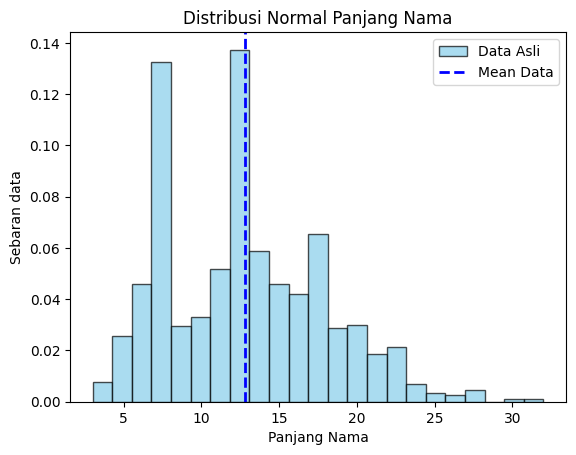

In [66]:
plt.hist(df["panjang_nama"], 
         bins='auto', density=True,
         alpha=0.7, color='skyblue', edgecolor='black', label='Data Asli')
plt.axvline(average, color='blue', linestyle='dashed', linewidth=2, label='Mean Data')

plt.title("Distribusi Normal Panjang Nama")
plt.xlabel("Panjang Nama")
plt.ylabel("Sebaran data")

plt.legend()
plt.show()

### Distibusi Normal Panjang Nama Theoretical vs Data

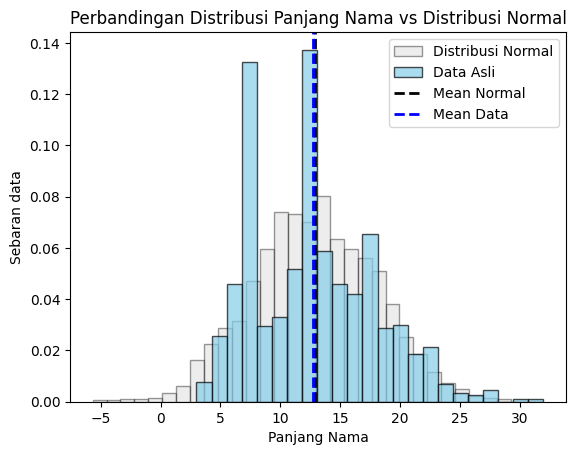

In [67]:
# Theoretical data
normal_dist = np.random.normal(average, std_dev, size)

# overlay
plt.hist(normal_dist, 
         bins='auto', density=True,
         color='lightgray', edgecolor='black', alpha=0.4, label='Distribusi Normal')

plt.hist(df["panjang_nama"], 
         bins='auto', density=True,
         alpha=0.7, color='skyblue', edgecolor='black', label='Data Asli')

# mean
plt.axvline(normal_dist.mean(), color='black', linestyle='dashed', linewidth=2, label='Mean Normal')
plt.axvline(average, color='blue', linestyle='dashed', linewidth=2, label='Mean Data')

# Labels and legend
plt.title("Perbandingan Distribusi Panjang Nama vs Distribusi Normal")
plt.xlabel("Panjang Nama")
plt.ylabel("Sebaran data")

plt.legend()
plt.show()

### test normal

In [68]:
stat,p= stats.normaltest(df['panjang_nama'])

print("d'agostino-pearson stat:", stat)
print("p-value:", p)

if p>0.05:
    print("data terdistribusi normal")
else:
    print("data tidak terdistribusi normal")


d'agostino-pearson stat: 63.16039283156566
p-value: 1.9270587680400594e-14
data tidak terdistribusi normal
